# Yolov3 Dataloader (Local Machine)

Author: Kevin Yu (github.com/yqlbu) \
Email: kevinyu211@yahoo.com \
 \
** This tool is tailored for those who want to train their custom dataset on a Yolov3 Model. 

** Make sure you read the instructions for each step carefully !!!

** If you following the instructions below step by step, it will generate a new trained-weight in the end, and you may download it to your local machine. 

** In the github repo, you can find a "demo.sh" to test the result. 

** You might need to **enable scrolling for cell outputs** by default. To do so, highlight all of the cells (Cmd A or Ctrl A) and change them to **"scrolled"**.

** Check if you have installed all the software dependecies for this project. if so, you may skip the Setup part.


#### Good Luck!

 # Setup

### Install Nvidia CUDA-10.0

In [ ]:
# Download & Install Nvidia GPU driver
#If you have already installed the GPU drive, please ignore this step
!wget https://objectstorage.ca-toronto-1.oraclecloud.com/n/yzpqsgba6ssd/b/bucket-20200415-0121/o/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!sudo apt-get update
!sudo apt-get install cuda

#set system path for CUDA 10.0
!echo 'export CUDA_HOME=/usr/local/cuda' >> ~/.bashrc
!echo 'export PATH=$PATH:$CUDA_HOME/bin' >> ~/.bashrc
!echo 'export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$CUDA_HOME/lib64' >> ~/.bashrc
!source ~/.bashrc

#Test if everything is working fine.
!nvcc --version
!nvidia-smi

### Install cuDNN-10.0 and other dependecies

In [ ]:
# Download the cuDNN driver
!wget https://objectstorage.ca-toronto-1.oraclecloud.com/n/yzpqsgba6ssd/b/bucket-20200415-0121/o/cudnn-10.0-linux-x64-v7.5.0.56.tgz -O cudnn-10.0-linux-x64-v7.5.0.56.tgz
# We're unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
!tar -xzvf cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# install python-nvcc plugin
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git
%load_ext nvcc_plugin

# check if installed successfully
!/usr/local/cuda/bin/nvcc --version

### Install cv2 and matplotlib dependencies

In [ ]:
#upgrade pip
!python3 -m pip install --upgrade pip

#cv2
!sudo apt-get install libopencv-dev
!sudo apt-get install python-opencv
!pip install opencv-python

#matplotlib
!pip install matplotlib

### Create a folder to store weights

In [ ]:
!mkdir /home/$USER/yolov3-dataloader-local/backup

### Clone Yolov3-Darknet

In [ ]:
!git clone https://github.com/AlexeyAB/darknet
%cd darknet
!wget https://objectstorage.ca-toronto-1.oraclecloud.com/n/yzpqsgba6ssd/b/bucket-20200415-0121/o/yolov3.weights -q --show-progress --no-clobber -O /home/$USER/yolov3-dataloader-local/darknet/yolov3.weights
!wget https://objectstorage.ca-toronto-1.oraclecloud.com/n/yzpqsgba6ssd/b/bucket-20200415-0121/o/yolov3-tiny.weights -q --show-progress --no-clobber -O /home/$USER/yolov3-dataloader-local/darknet/yolov3-tiny.weights
!wget https://objectstorage.ca-toronto-1.oraclecloud.com/n/yzpqsgba6ssd/b/bucket-20200415-0121/o/darknet53.conv.74 -q --show-progress --no-clobber -O /home/$USER/yolov3-dataloader-local/darknet/cfg/darknet53.conv.74

### Compile YOLOv3-Darknet with CUDA 10.0

In [ ]:
!export PATH=/usr/local/cuda-10.0/bin${PATH:+:${PATH}}
!export LD_LIBRARY_PATH=/usr/local/cuda-10.0/lib64${LD_LIBRARY_PATH:+:${LD_LIBRARY_PATH}}
%cd /home/$USER/yolov3-dataloader-local/darknet
!sed -i 's|GPU=0|GPU=1|' Makefile
!sed -i 's|CUDNN=0|CUDNN=1|' Makefile
!sed -i 's|OPENCV=0|OPENCV=1|' Makefile

In [ ]:
!make

# Upload dataset

*** Please follow the steps below to upload your dataset to the data folder located at  '/content/data'

**Step #0: Prepare your own dataset**

- On your local machine, create a new folder named "data"
- Put all the images and the ".xml" files associated with each image into this data folder
- Zip the data folder

*** Noted: 
- You should have a zip file called "data.zip" that contains all the images (.png/.jpg/.jpeg) aligned with the .xml files to be trained before moving to the next step.

**Step #1: Find the absolute path of your "data.zip" file in your local machine**

**Step #2: Unzip the data file to the 'yolov3-dataloader-local' directory**
- Note: if your path contains a " " (space), you should add a '\ ' between characters
- eg: '/content/drive/Shared\ drives/dataset/data.zip'
- Please replace <**DATA_DIR**> with the absolute path of your "data.zip" file
- Please make sure you correctly find your file path before executing this cell. Otherwise, it won't work.

In [ ]:
!unzip <DATA_DIR>/data.zip -d /home/$USER/yolov3-dataloader-local/
!echo '  Finished loading dataset !'

*** Noted: If the above commands excuted correctly, you may click the 'refresh button' on the left column, and you will see the data folder created inside the 'yolov3-dataloader-local' directory

*** Now you should be good to move forward ! Good Luck !

# Create config files for training

*** Notes (Please read carefully before you excute the cells below):

 - Please make sure you set config parameters below corrently. Otherwise, you will not be able to activate the training process.
 - **MODEL_NAME** is the name of your new model
 - **CLASS_NAME** is associated with all the classes that your dataset contains, please fill in the CLASS_NAME list correctly with your classes
 - **CLASS_NUM** is associated with the total number of classes that your dataset contains
 - **MAX_BATCHES** is the total number of iterations in the training
 - If you set all the parameters mentioned above properly, you should be good to move forward

In [1]:
import os
import getpass

#New Model Parameters

#Replace NEW_MODEL_NAME with your new model name
MODEL_NAME = 'pastry'
#Put your classes tag below
CLASS_NAME = [
    "milk_tea",
    "egg_targ",
    "pine_apple_bun"
]
#Replace # with your classes number (int), 2 is set as the default value
CLASS_NUM = 3
#Replace your desired batch # (6000 as default)
#Ideally the MAX_BATCHES = 2500*CLASS_NUM
MAX_BATCHES = 8000
 
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

USER=getpass.getuser()

#Show Training process
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

IMG_PATH = '/home/'+USER+'/yolov3-dataloader-local/darknet/chart.png'

#bash
%cd /home/$USER/yolov3-dataloader-local

/home/nvidia/yolov3-dataloader


In [ ]:
#class.names
with open(MODEL_NAME+'.names', "a+") as file:
    file.seek(0)
    for i in CLASS_NAME:
        file.write(i + '\n')
    print(MODEL_NAME+'.names'+' has been successfully created!')
    file.close()

In [ ]:
#class.data
with open(MODEL_NAME+'.data', "a+") as file:
    file.seek(0)
    file.write('classes = ' + str(CLASS_NUM) + '\n')
    file.write('train = /home/'+USER+'/yolov3-dataloader-local/train.txt' + '\n')
    file.write('valid = /home/'+USER+'/yolov3-dataloader-local/test.txt' + '\n')
    file.write('backup = /home/'+USER+'/yolov3-dataloader-local/backup' + '\n')
    file.write('names = /home/'+USER+'/yolov3-dataloader-local/' + MODEL_NAME + '.names' + '\n')
    print(MODEL_NAME+'.data'+' has been successfully created!')
    file.close()

In [ ]:
#dataDispatch.py
with open('dataDispatch.py', "r") as file:
    file.seek(0)
    all_lines = file.readlines()
    file.close()
with open('dataDispatch.py', "w") as file:
    all_lines[7] = 'classes = ' + str(CLASS_NAME) + '\n'
    print(all_lines[7].strip())
    file.writelines(all_lines)
    print('dataDispatch.py'+' has been successfully modified!')
    file.close()

In [ ]:
#class-yolov3-tiny.cfg
with open('temp-config.txt', "r") as file:
    file.seek(0)
    all_lines = file.readlines()
    file.close()
with open(MODEL_NAME+'-yolov3-tiny.cfg', "w") as file:
    #modify class #
    all_lines[134] = 'classes=' + str(CLASS_NUM) + '\n'
    all_lines[176] = 'classes=' + str(CLASS_NUM) + '\n'
    #modify max-batches
    all_lines[19] = 'max_batches = ' + str(MAX_BATCHES) + '\n'    
    #modify filter ## filter = (CLASS_NUM+5) *3 ##
    all_lines[126] = 'filters=' + str((CLASS_NUM+5) *3) + '\n'
    all_lines[170] = 'filters=' + str((CLASS_NUM+5) *3) + '\n'
    #overwrite all
    file.writelines(all_lines)
    print(MODEL_NAME+'-yolov3-tiny.cfg'+' has been successfully created!')
    file.close()

In [ ]:
#train.sh
with open('train.sh', "r") as file:
    file.seek(0)
    all_lines = file.readlines()
    file.close()
with open('train.sh', "w") as file:
    all_lines[0] = 'export DARKNET=/home/' + USER +'/yolov3-dataloader-local/darknet' + '\n'
    all_lines[1] = 'export PRJ_PATH=/home/' + USER +'/yolov3-dataloader-local' + '\n'
    all_lines[5] = '$PRJ_PATH/' + MODEL_NAME + '.data \\' + '\n'
    all_lines[6] = '$PRJ_PATH/' + MODEL_NAME+'-yolov3-tiny.cfg' + ' \\' + '\n'
    file.writelines(all_lines)
    print('train.sh'+' has been successfully modified!')
    file.close()

# Training

*** Notes:

 - Hit the "Refresh" button on the left column, and then navigate to the "/yolov3-dataloader-local" directory
 - Check if the directory contains the **".data"**, the **".names"**, and the **".cfg"** files. If you miss one or more of the files, please check the instructions from the above steps.
 - You might need to enable scrolling for cell outputs to fix the cell output window. You may find the option by right clicking the cell below.
 - Now you should be good to activate the training process, good luck !

In [ ]:
#start training
!export PATH=/usr/local/cuda-10.0/bin${PATH:+:${PATH}}
!export LD_LIBRARY_PATH=/usr/local/cuda-10.0/lib64${LD_LIBRARY_PATH:+:${LD_LIBRARY_PATH}}
%cd /home/$USER/yolov3-dataloader-local
!python dataDispatch.py
!sudo chmod +x /home/$USER/yolov3-dataloader-local/darknet/darknet
!sudo ./train.sh
!echo '*** Congratulations! Training has completed. Enjoy! ***'

Noted: Once the training has finished, the final weight is stored in the **'/yolov3-dataload/backup'** directory.

**Constantly monitor the training progress** \
\
You can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. \
For your model to be 'accurate' you would aim for a loss under 1.

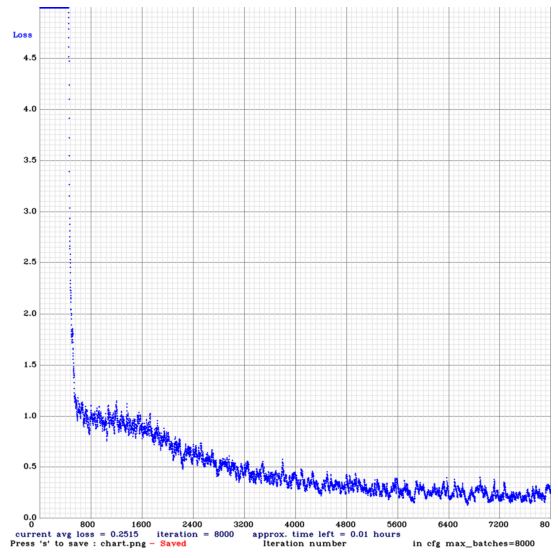

In [2]:
#show training progress
imShow(IMG_PATH)

# Demo

** Now that you have successfully trained your own dataset with the YOLOv3 model, it is time to test it out !

**Step 0: Create a demo script**

In [ ]:
#demo.sh
with open('demo.sh', "r") as file:
    file.seek(0)
    all_lines = file.readlines()
    file.close()
with open('demo.sh', "w") as file:
    all_lines[0] = 'export DARKNET=/home/' + USER +'/yolov3-dataloader-local/darknet' + '\n'
    all_lines[1] = 'export PRJ_PATH=/home/' + USER +'/yolov3-dataloader-local' + '\n'
    all_lines[5] = '$PRJ_PATH/' + MODEL_NAME + '.data \\' + '\n'
    all_lines[6] = '$PRJ_PATH/' + MODEL_NAME+'-yolov3-tiny.cfg' + ' \\' + '\n'
    all_lines[7] = '$PRJ_PATH/backup/' + MODEL_NAME+'-yolov3-tiny_final.weights' + ' \\' + '\n'
    file.writelines(all_lines)
    print('demo.sh'+' has been successfully modified!')
    file.close()

**Step 1: Test**

In [ ]:
!chmod +x demo.sh
!./demo.sh

**Notes:**
- To import stream data from a media file, you need to place the media file (.mp4, .mkv, .avi) inside the directory, and then replace "-c 0 -thresh .5" with **"-ext-out $PRJ_PATH\YOUR_MEDIA"** to the last line of "demo.sh"
- To stream the detector output, you may use the http_tcp, json, and mjpeg streaming protocol.  \
   \
  For **JSON**: add -json_port 8080 -ext_output \
  For **mjpeg**: add -mjpeg_port 8070 -ext_output
  
- To store the output, you may add **-out_filename output.mp4**

- If you have any suggestions or comments, please contact me via kevinyu211@yahoo.com